# Importando as bibliotecas necessárias

In [ ]:
# Comando para instalar todas as dependências utilizadas no projeto.
# pip install -r requirements 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [24]:
# Carregar os dados do arquivo CSV de entrevistados para um DataFrame
entrevistados = pd.read_csv('Scripts\\Entrevistados\\1_qtd_entrevistados.csv', sep=',')

# Exibir as primeiras linhas para garantir o carregamento correto dos dados
entrevistados.head()

,mes,qtd_pessoas_entrevistadas
0,9,387298
1,10,380461
2,11,381438


In [25]:
# Função para mapear, substituir e reordenar o DataFrame de acordo com a ordem dos meses
def converter_meses(df, coluna):
    meses = {9: 'Setembro', 10: 'Outubro', 11:'Novembro'}
    df[coluna] = df[coluna].map(meses)

    mes_order = ['Setembro', 'Outubro', 'Novembro']
    df[coluna] = pd.Categorical(df[coluna], categories = mes_order, ordered=True)

# Conversão dos meses do DataFrame 'entrevistados'
converter_meses(entrevistados, 'mes')

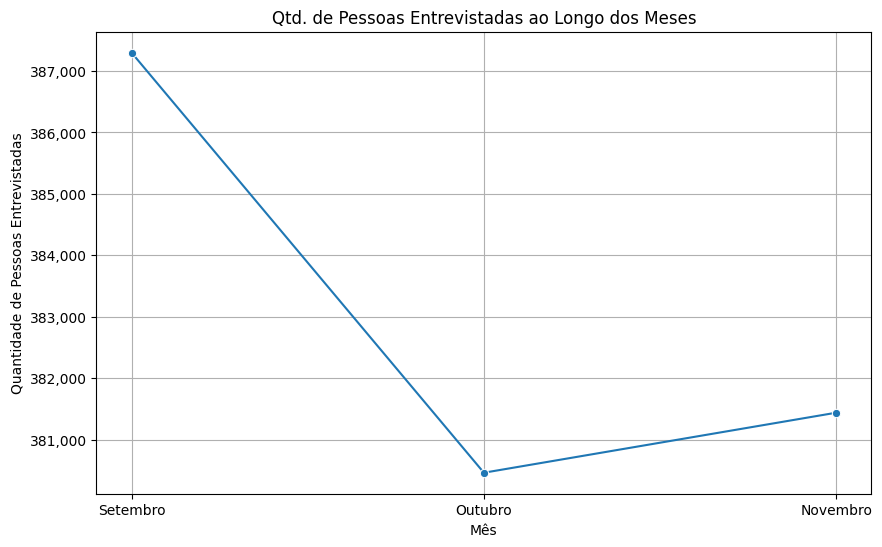

In [26]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize= (10, 6))
sns.lineplot(data=entrevistados, x='mes', y='qtd_pessoas_entrevistadas', marker='o')

# Configurar a formatação dos números
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
plt.title('Qtd. de Pessoas Entrevistadas ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pessoas Entrevistadas')
plt.grid(True)
plt.show()

# **População**
### ----- 04 questões selecionadas
<ul>
    <li>a002: Idade
    <li>a003: Sexo (biológico)
    <li>a004: Raça / Cor
    <li>a005: Escolaridade
</ul>

In [27]:
# Carregar os dados da população em DataFrames
df_escolaridade = pd.read_csv('Scripts\\Entrevistados\\1_count_escolaridade.csv')
df_idade_sexo = pd.read_csv('Scripts\\Entrevistados\\1_idade_sexo.csv', sep=',')

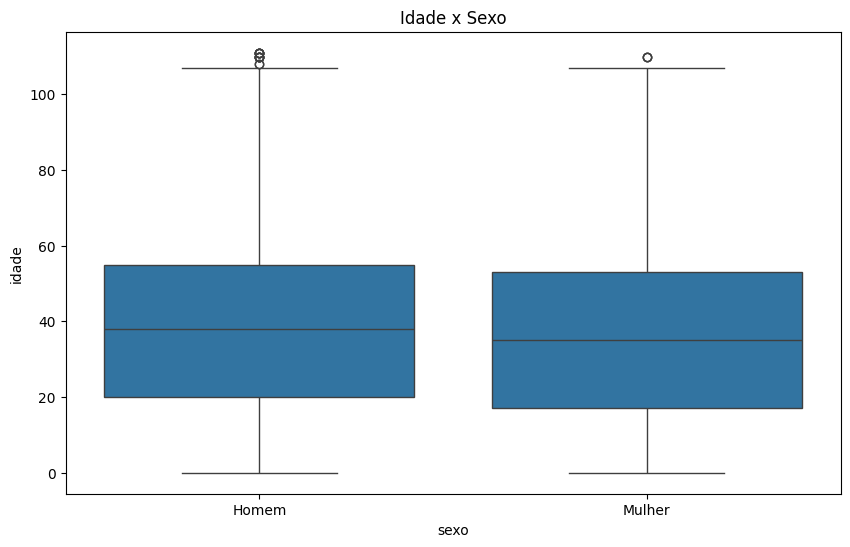

In [28]:
# Plotar um boxplot relacionando sexo e idade dos entrevistados
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_idade_sexo, x='sexo', y='idade', ax=ax)

# Definir título
plt.title('Idade x Sexo')
plt.show()

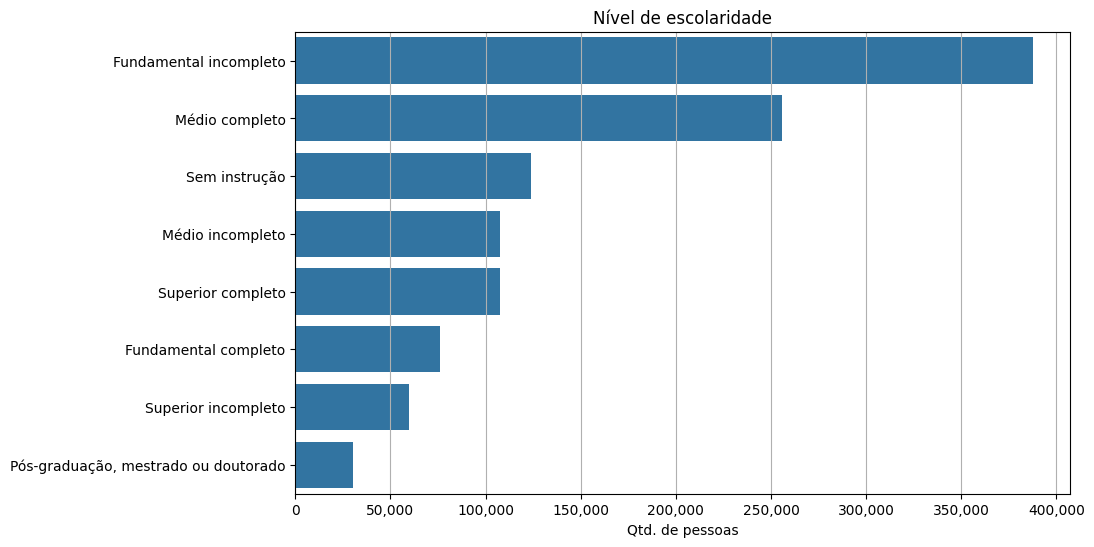

In [29]:
# Ordenar pelo valor da coluna 'quantidade'
df_escolaridade.sort_values(by='quantidade', ascending=False, inplace=True)

# Plotar um gráfico de barras para visualizar o nível de escolaridade dos entrevistados
fig, ax = plt.subplots(figsize= (10, 6))
sns.barplot(data=df_escolaridade, x='quantidade', y='escolaridade', orient='h', ax=ax)

# Configurar a formatação dos números
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
plt.title('Nível de escolaridade')
plt.ylabel('')
plt.xlabel('Qtd. de pessoas')
ax.xaxis.grid(True)
plt.show()

# **Sintomas**
### ----- 05 questões selecionadas
<ul>
    <li>b1 (dividida entre 13 subquestões):
        <ol>
            <li>b0011: Na semana passada teve febre?
            <li>b0012: Na semana passada teve tosse?
            <li>b0013: Na semana passada teve dor de garganta?
            <li>b0014: Na semana passada teve dificuldade para respirar?
            <li>b0015: Na semana passada teve dor de cabeça?
            <li>b0016: Na semana passada teve dor no peito?
            <li>b0017: Na semana passada teve náusea?
            <li>b0018: Na semana passada teve nariz entupido e/ou escorrendo?
            <li>b0019: Na semana passada teve fadiga?
            <li>b00110: Na semana passada teve dor nos olhos?
            <li>b00111: Na semana passada teve perda de cheiro ou sabor?
            <li>b00112: Na semana passada teve dor muscular?
            <li>b00113: Na semana passada teve diarreia?
        </ol>
    <li>b002: Por causa disso, foi a algum estabelecimento de saude?
    <li>b008: O(A) Sr(a) fez algum teste para saber se estava infectado(a) pelo coronavírus?
    <li>b009 (dividida entre 6 subquestões):
        <ol>
            <li> b009a: Fez o exame coletado com cotonete na boca e/ou nariz (SWAB)?
            <li> b009b: Qual o resultado?
            <li> b009c: Fez o exame de coleta de sangue através de furo no dedo?
            <li> b009d: Qual o resultado?
            <li> b009e: Fez o exame de coleta de sangue através da veia da braço?
            <li> b009f: Qual o resultado?
        </ol> 
    <li>b011: Na semana passada, devido à pandemia do Coronavírus, em que medida o(a) Sr(a) restringiu o contato com as pessoas?
</ul>

In [30]:
# Carregar os dados dos sintomas e a ação da população em relação aos mesmos em DataFrames
df_medida_restritiva = pd.read_csv('Scripts\\Sintomas\\2_count_medida_restritiva_sintoma.csv', sep=';')
df_sintomas = pd.read_csv('Scripts\\Sintomas\\2_sum_sintomas.csv', sep=',')
df_atendimento = pd.read_csv('Scripts\\Sintomas\\2_buscou_atendimento.csv', sep=',')
df_plano_saude = pd.read_csv('Scripts\\Trabalho\\3_count_plano_saude.csv', sep=',')
df_resultados_testes = pd.read_csv('Scripts\\Sintomas\\2_resultados_testes.csv', sep=',')

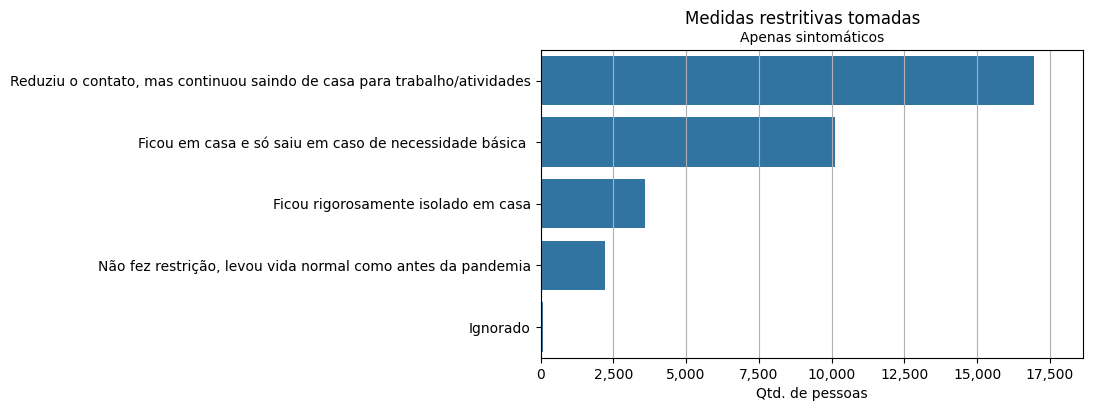

In [31]:
# Ordenar pelo valor da coluna 'quantidade'
df_medida_restritiva.sort_values(by='Quantidade', ascending=False, inplace=True)

# Plotar um gráfico de barras para visualizar as medidas restritivas tomadas por pessoas que apresentaram um ou mais sintomas
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(data=df_medida_restritiva, x='Quantidade', y='Categoria', orient='h', ax=ax)

# Configurar a formatação dos números
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
ax.xaxis.grid(True) # Adiciona grade de fundo, apenas no eixo x
plt.suptitle('Medidas restritivas tomadas')
ax.set_title('Apenas sintomáticos', fontsize=10)
plt.ylabel('')
plt.xlabel('Qtd. de pessoas')
plt.xlim(0, df_medida_restritiva['Quantidade'].max() * 1.1)
plt.show()

In [32]:
# Conversão dos meses do DataFrame 'df_atendimento'
converter_meses(df_atendimento, 'mes')

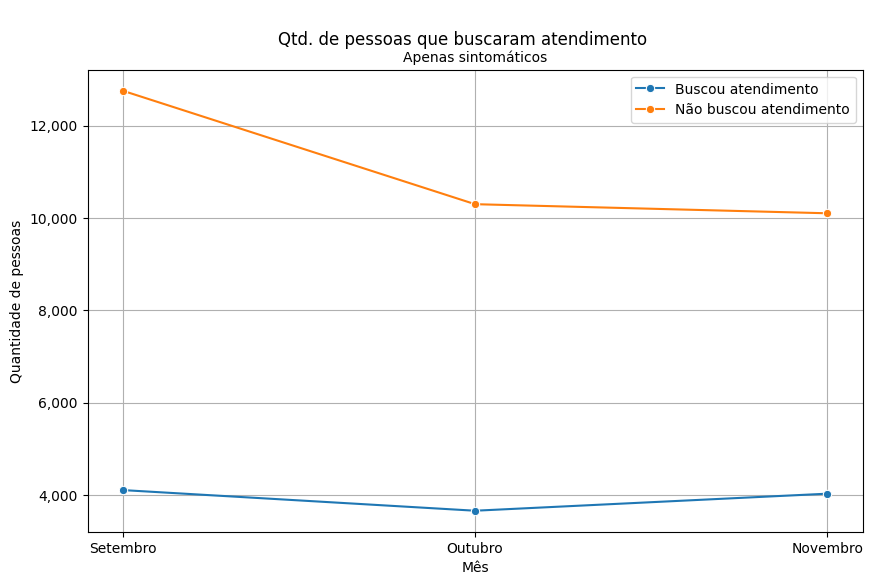

In [33]:
# Plotar um gráfico de linhas para análisar a busca por atendimento de pessoas sintomáticas ao longo dos meses
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_atendimento, x='mes', y='quantidade', hue='buscou_atendimento', ax=ax, marker='o')
ax.legend(title='')

# Configurar a formatação dos números
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
plt.suptitle('\nQtd. de pessoas que buscaram atendimento')
ax.set_title('Apenas sintomáticos', fontsize=10)
plt.xlabel('Mês')
plt.ylabel('Quantidade de pessoas')
ax.grid(True)

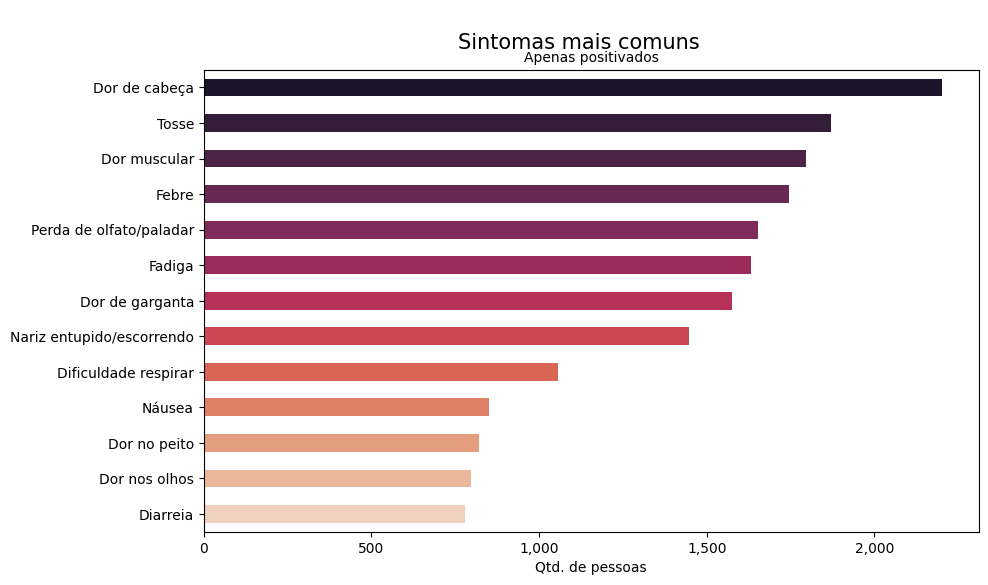

In [34]:
# Ordenar o DataFrame de acordo com os valores da coluna 'contagem'
df_sintomas.sort_values(by='contagem', ascending=False, inplace=True)

# Plotar um gráfico de barras para visualizar os sintomas mais comuns apresentados em pessoas positivadas
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=df_sintomas, x='contagem', y='sintoma', orient='h', ax=ax, width=0.5, hue='sintoma', palette='rocket')

# Configurar a formatação dos números
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
plt.suptitle('\nSintomas mais comuns', fontsize='15')
ax.set_title('Apenas positivados', fontsize=10)
plt.xlabel('Qtd. de pessoas')
plt.ylabel('')
plt.show()

In [35]:
# Conversão dos meses do DataFrame 'df_resultados_testes'
converter_meses(df_resultados_testes, 'mes')

Text(0, 0.5, 'Qtd. de Testes Realizados')

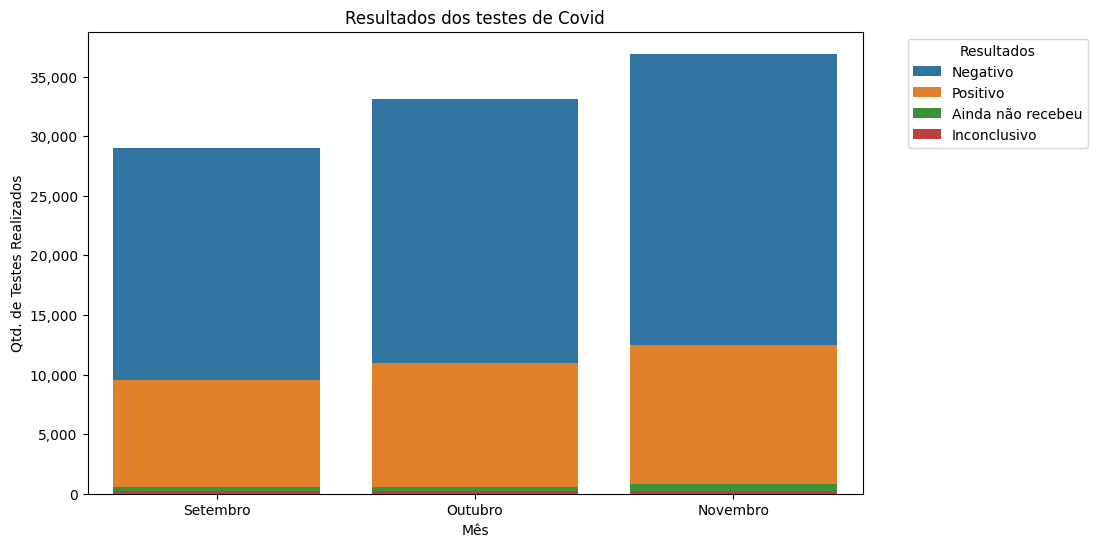

In [36]:
# Plotar gráficos sobrepostos dos resultados dos testes realizados
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=df_resultados_testes, x='mes', y='teste_negativo', label='Negativo') # Teste com resultado negativo
sns.barplot(data=df_resultados_testes, x='mes', y='teste_positivo', label='Positivo') # Teste com resultado positivo
sns.barplot(data=df_resultados_testes, x='mes', y='teste_ainda_nao_recebeu', label='Ainda não recebeu')  # Teste com resultado ainda não recebido
sns.barplot(data=df_resultados_testes, x='mes', y='teste_inconclusivo', label='Inconclusivo') # Teste com resultado inconclusivo

# Configurar a formatação dos números
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
ax.legend(title='Resultados', bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title('Resultados dos testes de Covid')
plt.xlabel('Mês')
plt.ylabel('Qtd. de Testes Realizados')

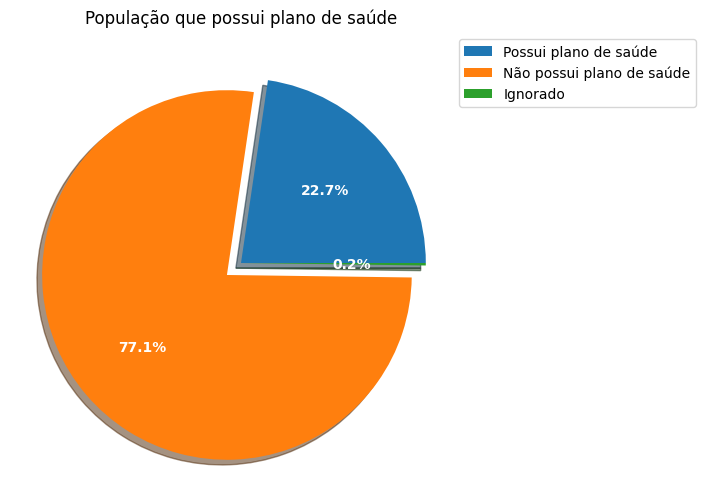

In [37]:
# Realizando a configuração e definição dos dados para utilização no gráfico
fig, ax = plt.subplots(figsize = (10, 6))
sizes = df_plano_saude['contagem']
labels = df_plano_saude['plano_saude']
explode = (0, 0.1, 0)

# Criar o gráfico de pizza para mostrar a porcentagem de pessoas que possuem plano de saúde
wedges, texts, autotexts = plt.pie(sizes, autopct='%1.1f%%', explode=explode, shadow=True)

# Configurar legenda e título do gráfico
ax.legend(wedges, labels, loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('População que possui plano de saúde')
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.show()

# Grupo risco
### ----- 01 questão selecionada
<ul>
    <li>b010 (divida entre 6 subquestões):
    <ol>
        <li>b0101: Algum médico já lhe deu o diagnóstico de diabetes?
        <li>b0102: Algum médico já lhe deu o diagnóstico de hipertensão?
        <li>b0103: Algum médico já lhe deu o diagnóstico de asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão?
        <li>b0104: Algum médico já lhe deu o diagnóstico de doenças do coração (infarto, angina, insuficiência cardiáca, arritima)?
        <li>b0105: Algum médico já lhe deu o diagnóstico de depressão?
        <li>b0106: Algum médico já lhe deu o diagnóstico de câncer?
    </ol>
</ul>

In [38]:
# Carregar os dados relacionados à pessoas no grupo de risco em DataFrames
df_grupo_risco_medidas_restricao = pd.read_csv('Scripts\\Grupo Risco\\4_count_grupo_risco_medidas_restricao.csv', sep=',')
df_grupo_risco_plano_saude = pd.read_csv('Scripts\\Grupo Risco\\4_count_grupo_risco_plano_saude.csv', sep=',')
df_grupo_risco_positivado = pd.read_csv('Scripts\\Grupo Risco\\4_count_grupo_risco_positivado.csv', sep=',')
df_grupo_risco = pd.read_csv('Scripts\\Grupo Risco\\4_count_grupo_risco.csv', sep=',')

In [39]:
# Realizar a junção de todos os dados em um único DataFrame
grupo_risco = pd.merge(df_grupo_risco, df_grupo_risco_plano_saude, on='grupo_risco')
grupo_risco = pd.merge(grupo_risco, df_grupo_risco_medidas_restricao, on='grupo_risco')
grupo_risco = pd.merge(grupo_risco, df_grupo_risco_positivado, on='grupo_risco')

# Verificar se os dados foram unidos corretamente
grupo_risco.head()

,grupo_risco,contagem,possui_plano_saude,nao_possui_plano_saude,nao_restringiu_ou_restringiu_pouco,tentou_restringir_ou_restringiu,soma_positivo_covid
0,Diabetes,67417,17522,49888,21763,45555,2626
1,Faixa etária,188371,51323,136705,46186,141472,4403
2,Hipertensão,174546,43738,130790,63843,110457,6094
3,Doenças cardíacas,32542,9588,22948,9562,22927,1162
4,Doenças respiratórias,57334,17419,39906,23124,34089,2087


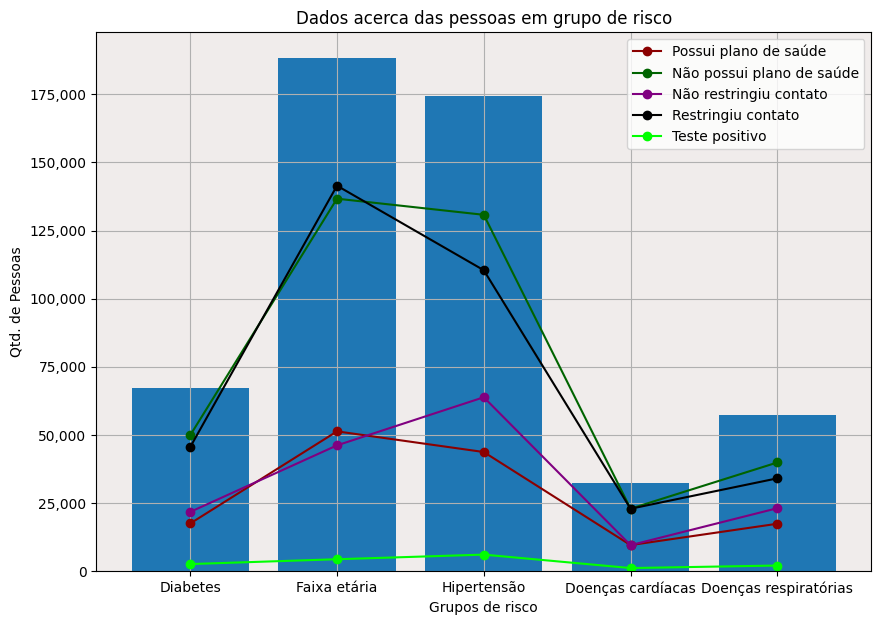

In [40]:
# Configurar o gráfico
fig, ax = plt.subplots(figsize = (10, 7))
ax.set_facecolor('#f0eceb')
ax.grid(True)

# Plotar gráficos de linha para dados de cada categoria do grupo de risco
plt.plot(grupo_risco['grupo_risco'], grupo_risco['possui_plano_saude'], color='darkred', marker='o', label='Possui plano de saúde') # Quantos possuem plano de saúde
plt.plot(grupo_risco['grupo_risco'], grupo_risco['nao_possui_plano_saude'], color='darkgreen', marker='o', label='Não possui plano de saúde') # Quantos não possuem plano de saúde
plt.plot(grupo_risco['grupo_risco'], grupo_risco['nao_restringiu_ou_restringiu_pouco'], color='purple', marker='o', label='Não restringiu contato') # Quantos restringiram contato
plt.plot(grupo_risco['grupo_risco'], grupo_risco['tentou_restringir_ou_restringiu'], color='black', marker='o', label='Restringiu contato') # Quantos não restringiram contato
plt.plot(grupo_risco['grupo_risco'], grupo_risco['soma_positivo_covid'], color='lime', marker='o', label='Teste positivo') # Quantos obtiveram um teste positivo

# Configurar a formatação dos números
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Plotar um gráfico de barras para quantidade de pessoas em cada categoria do grupo de risco
plt.bar(grupo_risco['grupo_risco'], grupo_risco['contagem'])

# Definir título e rótulos
ax.legend()
plt.title('Dados acerca das pessoas em grupo de risco')
plt.xlabel('Grupos de risco')
plt.ylabel('Qtd. de Pessoas')

plt.show()

# Trabalho
### ----- 07 questões selecionadas
<ul>
    <li>c001: Na semana passada, por pelo menos uma hora, trabalhou ou fez algum bico?
    <li>c008: Quantas horas, por semana, normalmente trabalhava?
    <li>c009: Quantas horas, na semana passada, de fato trabalhou?
    <li>c01012: Valor em dinheiro (que retirava normalmente em todos os trabalhos)
    <li>c011a12: Valor em dinheiro (que retirou, de fato, no mês de referência)
    <li>c012: Na maior parte do tempo, na semana passada, esse trabalho (único ou principal) foi exercido no mesmo local em que costuma trabalhar?
    <li>c013: Na semana passada, o(a) Sr(a) estava em trabalho remoto (home office ou teletrabalho)?
</ul>


In [41]:
# Carregar os dados relacionados à trabalho em DataFrame
df_home_office = pd.read_csv('Scripts\\Trabalho\\3_count_home_office.csv', sep=',')
df_horas_relativas_semana_anterior = pd.read_csv('Scripts\\Trabalho\\3_count_horas_relativas_semana_anterior.csv', sep=',')
df_salario_relativo_semana_anterior = pd.read_csv('Scripts\\Trabalho\\3_count_salario_relativo_semana_anterior.csv', sep=',')
df_trabalho = pd.read_csv('Scripts\\Trabalho\\3_trabalho.csv', sep=',')

In [42]:
# Conversão dos meses do DataFrame 'df_trabalho'
converter_meses(df_trabalho, 'mes')

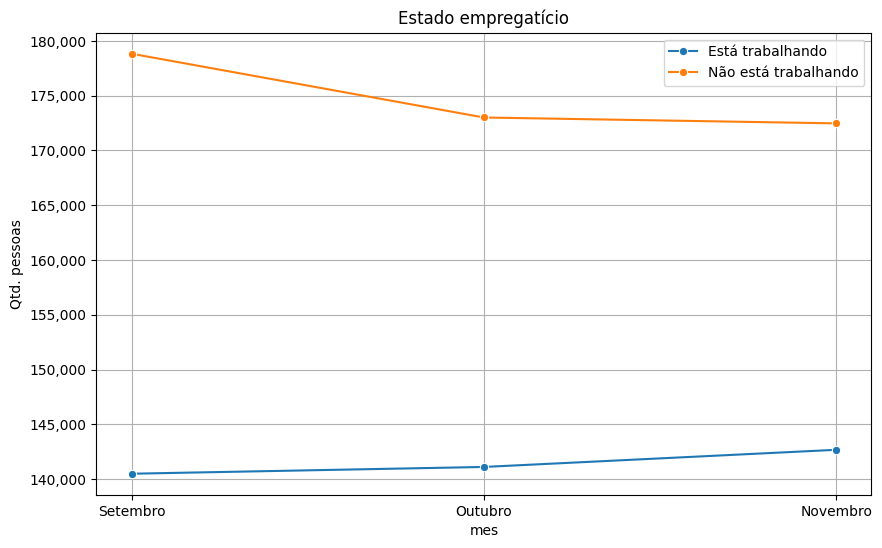

In [43]:
# Plotar um gráfico de linhas mostrando a situação de trabalho das pessoas entrevistadas ao longo dos meses
fig, ax = plt.subplots(figsize = (10, 6))
sns.lineplot(data=df_trabalho, x='mes', y='trabalhando', label='Está trabalhando', marker='o')
sns.lineplot(data=df_trabalho, x='mes', y='nao_trabalhando', label='Não está trabalhando', marker='o')

# Configurar a formatação dos números
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
ax.legend()
ax.grid(True)
plt.title('Estado empregatício')
plt.xlabel('mes')
plt.ylabel('Qtd. pessoas')
plt.show()

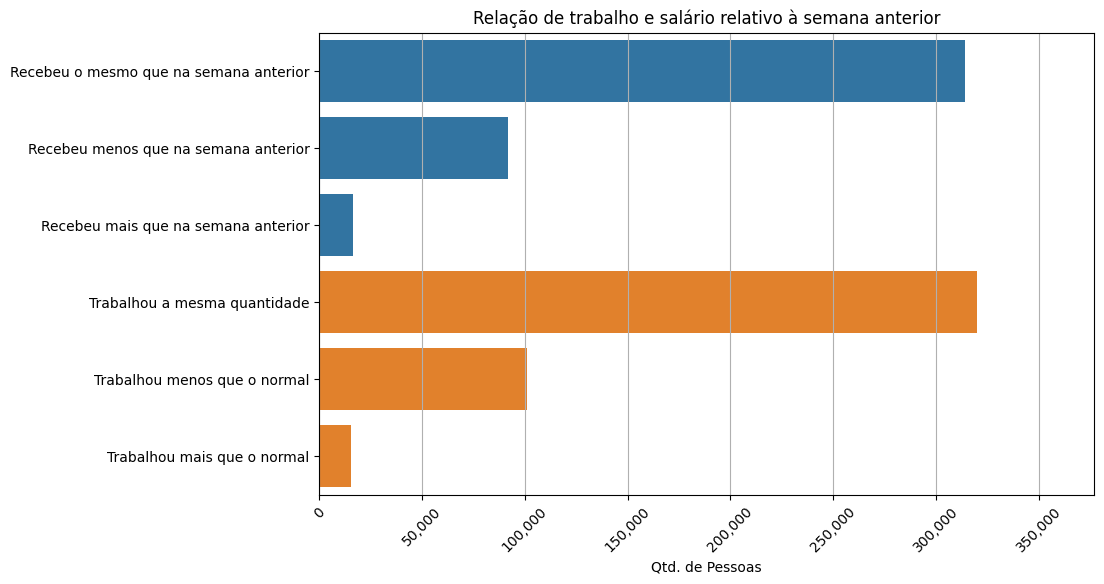

In [44]:
# Ordenar os DataFrames de acordo com os valores da coluna 'contagem'
df_horas_relativas_semana_anterior.sort_values(by='contagem', ascending=False, inplace=True)
df_salario_relativo_semana_anterior.sort_values(by='contagem', ascending=False, inplace=True)

# Plotar um gráfico com os dados de ambos os DataFrames mostrando a quantidade de horas trabalhadas e salário recebido de acordo com a semana anterior
fig, ax = plt.subplots(figsize= (10, 6))
sns.barplot(data=df_salario_relativo_semana_anterior, x='contagem', y='renda_relativa_semana_anterior', orient='h')
sns.barplot(data=df_horas_relativas_semana_anterior, x='contagem', y='carga_horaria_relativa_semana_anterior', orient='h')

# Configurar a formatação dos números
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Definir título e rótulos
plt.xlim(0, df_salario_relativo_semana_anterior['contagem'].max() * 1.2)
plt.grid(axis='x')
plt.title('Relação de trabalho e salário relativo à semana anterior')
plt.ylabel('')
plt.xlabel('Qtd. de Pessoas')
plt.xticks(rotation=45)
plt.show()